# <center> UE22CS342AA2 - Data Analytics </center>

# <center> Worksheet 4b : Association rule mining (Market Basket Analysis) </center>

<center> Designed by Amritha GK, PESU-25 </center>

<br>

- Student name: Mohul Y P
- SRN: PES1UG22CS360
- Section: F

Assume that you travel to another parallel universe, where your alter-ego owns a side-hustle retail store. You decide to take up an exercise on association rule mining to improve your skills and extract some essential information to help your alter-ego grow their business.

Given is a dataset that contains some information regarding the transactions at the hypothetical "store".



### About the Dataset:

- BillNo - Identifier for the transaction

- Itemname - Name of the product

- Quantity - Product quantity

- Date - Date and time of the transaction

- Price - Price per item (assumed in Pound Sterling) 

- CustomerID - Identifier for the customer

- Country


For those solving with R, Use the **'arules'** and **'arulesViz'** package wherever necessary.

For those solving with Python, use the **'mlxtend'** or **'apyori'** or any other suitable package wherever necessary

## Install the required packages

In [2]:
#install.packages(readxl)

#install.packages("arules")

#install.packages("arulesViz")

## Load the required packages

In [2]:
# library(readxl) 

# library(dplyr)

# library(arules)

# library(arulesViz)

## Load the dataset and create dataframe

In [3]:
# Your code here
import pandas as pd

# Make sure the file path is correct in your environment
file_path = '/kaggle/input/online-retail-dataset/Worksheet-4b_Online_retail_dataset.xlsx'

# Load the dataset
df = pd.read_excel(file_path)

# Display the first few rows of the dataframe
df.head()

BillNo                             Itemname  Quantity                Date  \
0  536365   WHITE HANGING HEART T-LIGHT HOLDER         6 2010-12-01 08:26:00   
1  536365                  WHITE METAL LANTERN         6 2010-12-01 08:26:00   
2  536365       CREAM CUPID HEARTS COAT HANGER         8 2010-12-01 08:26:00   
3  536365  KNITTED UNION FLAG HOT WATER BOTTLE         6 2010-12-01 08:26:00   
4  536365       RED WOOLLY HOTTIE WHITE HEART.         6 2010-12-01 08:26:00   

   Price  CustomerID         Country  
0   2.55     17850.0  United Kingdom  
1   3.39     17850.0  United Kingdom  
2   2.75     17850.0  United Kingdom  
3   3.39     17850.0  United Kingdom  
4   3.39     17850.0  United Kingdom

## Dataset preparation

Perform data cleaning, Transform the representation as suitable for this problem

Some hints to help you get started:
- Check the summary, number of rows and columns
- Remove duplicate entries
- Check which columns contain information that is necessary for this exercise
- Remove rows with NA values in these columns.

### (1 point)

In [4]:
df.columns

Index(['BillNo', 'Itemname', 'Quantity', 'Date', 'Price', 'CustomerID',
       'Country'],
      dtype='object')

In [5]:
# Check the number of rows and columns
print(df.shape)

(522064, 7)


In [6]:
# Check the summary of the dataset
print(df.describe())

            Quantity                           Date          Price  \
count  522064.000000                         522064  522064.000000   
mean       10.090435  2011-07-04 12:51:20.777107456       3.826801   
min     -9600.000000            2010-12-01 08:26:00  -11062.060000   
25%         1.000000            2011-03-28 10:15:00       1.250000   
50%         3.000000            2011-07-20 08:59:00       2.080000   
75%        10.000000            2011-10-19 14:12:00       4.130000   
max     80995.000000            2011-12-09 12:50:00   13541.330000   
std       161.110525                            NaN      41.900599   

          CustomerID  
count  388023.000000  
mean    15316.931710  
min     12346.000000  
25%     13950.000000  
50%     15265.000000  
75%     16837.000000  
max     18287.000000  
std      1721.846964  


In [7]:
# Check for missing values
print(df.isnull().sum())

BillNo             0
Itemname        1455
Quantity           0
Date               0
Price              0
CustomerID    134041
Country            0
dtype: int64


In [8]:
# Remove rows where 'Itemname' or 'BillNo' is missing
df_cleaned = df.dropna(subset=['Itemname', 'BillNo'])

# Remove duplicates
df_cleaned = df_cleaned.drop_duplicates()

# Remove transactions with negative or zero quantity (assuming these are returns)
df_cleaned = df_cleaned[df_cleaned['Quantity'] > 0]

# Check the cleaned dataset
print(df_cleaned.isnull().sum())  # Check if any missing values remain
print(df_cleaned.head())

BillNo             0
Itemname           0
Quantity           0
Date               0
Price              0
CustomerID    132039
Country            0
dtype: int64
   BillNo                             Itemname  Quantity                Date  \
0  536365   WHITE HANGING HEART T-LIGHT HOLDER         6 2010-12-01 08:26:00   
1  536365                  WHITE METAL LANTERN         6 2010-12-01 08:26:00   
2  536365       CREAM CUPID HEARTS COAT HANGER         8 2010-12-01 08:26:00   
3  536365  KNITTED UNION FLAG HOT WATER BOTTLE         6 2010-12-01 08:26:00   
4  536365       RED WOOLLY HOTTIE WHITE HEART.         6 2010-12-01 08:26:00   

   Price  CustomerID         Country  
0   2.55     17850.0  United Kingdom  
1   3.39     17850.0  United Kingdom  
2   2.75     17850.0  United Kingdom  
3   3.39     17850.0  United Kingdom  
4   3.39     17850.0  United Kingdom  


In [9]:
# Group the data by BillNo to create a list of items purchased in each transaction
transaction_list = df_cleaned.groupby('BillNo')['Itemname'].apply(list).values.tolist()

# Check the first few transactions
print(transaction_list[:5])

# Convert the transaction list into the required format for mlxtend
from mlxtend.preprocessing import TransactionEncoder

te = TransactionEncoder()
te_ary = te.fit(transaction_list).transform(transaction_list)

# Create the DataFrame in the format needed for association rules
df_trans = pd.DataFrame(te_ary, columns=te.columns_)

# Check the first few rows of the DataFrame
print(df_trans.head())

[['WHITE HANGING HEART T-LIGHT HOLDER', 'WHITE METAL LANTERN', 'CREAM CUPID HEARTS COAT HANGER', 'KNITTED UNION FLAG HOT WATER BOTTLE', 'RED WOOLLY HOTTIE WHITE HEART.', 'SET 7 BABUSHKA NESTING BOXES', 'GLASS STAR FROSTED T-LIGHT HOLDER'], ['HAND WARMER UNION JACK', 'HAND WARMER RED POLKA DOT'], ['ASSORTED COLOUR BIRD ORNAMENT', "POPPY'S PLAYHOUSE BEDROOM", "POPPY'S PLAYHOUSE KITCHEN", 'FELTCRAFT PRINCESS CHARLOTTE DOLL', 'IVORY KNITTED MUG COSY', 'BOX OF 6 ASSORTED COLOUR TEASPOONS', 'BOX OF VINTAGE JIGSAW BLOCKS', 'BOX OF VINTAGE ALPHABET BLOCKS', 'HOME BUILDING BLOCK WORD', 'LOVE BUILDING BLOCK WORD', 'RECIPE BOX WITH METAL HEART', 'DOORMAT NEW ENGLAND'], ['JAM MAKING SET WITH JARS', 'RED COAT RACK PARIS FASHION', 'YELLOW COAT RACK PARIS FASHION', 'BLUE COAT RACK PARIS FASHION'], ['BATH BUILDING BLOCK WORD']]
   *Boombox Ipod Classic  *USB Office Mirror Ball  10 COLOUR SPACEBOY PEN  \
0                  False                    False                   False   
1                  Fal

In [ ]:

# Your code here





# Convert the dataframe into a list of transactions

#transaction_list <- split(cleaned_df$Itemname, cleaned_df$BillNo)



# Convert the list into a transactions object

#trans <- as(transaction_list, "transactions")





# Create an item frequency plot



# Your code here

## Problem 1

1. What are the 10 most popular itemsets, given Minimum Support Count = 0.02? Display the itemsets, frequency and support.

2. Find Confidence and Lift of the association rule "{PINK REGENCY TEACUP AND SAUCER} => {GREEN REGENCY TEACUP AND SAUCER}".

3. Based on the value of Lift, what do you infer regarding the given association rule?


### 3 points (1+1+1)

In [11]:
# Your code here

from mlxtend.frequent_patterns import apriori, association_rules

# Perform Apriori algorithm to find frequent itemsets with min support of 0.02
min_support = 0.02
frequent_itemsets = apriori(df_trans, min_support=min_support, use_colnames=True)

# Sort the itemsets by their frequency (support)
frequent_itemsets_sorted = frequent_itemsets.sort_values(by='support', ascending=False)

# Display the 10 most popular itemsets
print("10 most popular itm sets:")
print(frequent_itemsets_sorted.head(10))

10 most popular itm sets:
      support                              itemsets
276  0.111578  (WHITE HANGING HEART T-LIGHT HOLDER)
104  0.104586             (JUMBO BAG RED RETROSPOT)
199  0.096478            (REGENCY CAKESTAND 3 TIER)
159  0.083912                       (PARTY BUNTING)
129  0.078085             (LUNCH BAG RED RETROSPOT)
15   0.072511       (ASSORTED COLOUR BIRD ORNAMENT)
220  0.068204    (SET OF 3 CAKE TINS PANTRY DESIGN)
151  0.064809     (PACK OF 72 RETROSPOT CAKE CASES)
122  0.063846             (LUNCH BAG  BLACK SKULL.)
141  0.062427      (NATURAL SLATE HEART CHALKBOARD)


In [12]:
# Generate association rules from the frequent itemsets
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

# Find the rule involving the two products: PINK REGENCY TEACUP AND SAUCER => GREEN REGENCY TEACUP AND SAUCER
rule = rules[(rules['antecedents'] == {'PINK REGENCY TEACUP AND SAUCER'}) & 
             (rules['consequents'] == {'GREEN REGENCY TEACUP AND SAUCER'})]

# Display the confidence and lift of the rule
print("\nRule: {PINK REGENCY TEACUP AND SAUCER} => {GREEN REGENCY TEACUP AND SAUCER}")
print(rule[['antecedents', 'consequents', 'confidence', 'lift']])


Rule: {PINK REGENCY TEACUP AND SAUCER} => {GREEN REGENCY TEACUP AND SAUCER}
                         antecedents                        consequents  \
27  (PINK REGENCY TEACUP AND SAUCER)  (GREEN REGENCY TEACUP AND SAUCER)   

    confidence       lift  
27    0.822011  16.638343  


**INTERPRETATION OF LIFT:**

The confidence of 82.2% means that if someone buys the PINK REGENCY TEACUP AND SAUCER, there's an 82.2% chance they'll also buy the GREEN REGENCY TEACUP AND SAUCER.

The lift of 16.64 means these two items are very strongly linked — they are much more likely to be bought together compared to random purchases.

## Problem 2

1. What are the top-5 itemsets that you would recommend for cross-selling?

Hint: Association rules. List the antecedents, consequents, support, confidence and lift.


2. Recount a personal experience where you have come across cross-selling or up-selling in any of your purchases (be it online, at restaurants or some other place). Was it useful to you? Did you accept or decline the offer?



### 2 points (1+1)

In [13]:
# Your code here
# Preparing the data for association rule mining
from mlxtend.frequent_patterns import apriori, association_rules

# One-hot encoding the data to use with apriori algorithm
basket = df.groupby(['BillNo', 'Itemname'])['Quantity'].sum().unstack().reset_index().fillna(0)
basket_sets = basket.set_index('BillNo').applymap(lambda x: 1 if x > 0 else 0)

/tmp/ipykernel_33/3660262092.py:7: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  basket_sets = basket.set_index('BillNo').applymap(lambda x: 1 if x > 0 else 0)


In [14]:
# Apply the apriori algorithm with minimum support of 0.02
frequent_itemsets = apriori(basket_sets, min_support=0.02, use_colnames=True)

# Generating association rules from the frequent itemsets
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.0)

# Sorting rules by lift to find the top 5 itemsets for cross-selling
top_5_rules = rules.sort_values('lift', ascending=False).head(5)

# Display the results
top_5_rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']]


/opt/conda/lib/python3.10/site-packages/mlxtend/frequent_patterns/fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


antecedents  \
157                   (PINK REGENCY TEACUP AND SAUCER)   
152  (GREEN REGENCY TEACUP AND SAUCER, ROSES REGENC...   
155                  (GREEN REGENCY TEACUP AND SAUCER)   
154  (ROSES REGENCY TEACUP AND SAUCER, PINK REGENCY...   
24                   (GREEN REGENCY TEACUP AND SAUCER)   

                                           consequents   support  confidence  \
157  (GREEN REGENCY TEACUP AND SAUCER, ROSES REGENC...  0.025485    0.699728   
152                   (PINK REGENCY TEACUP AND SAUCER)  0.025485    0.704514   
155  (ROSES REGENCY TEACUP AND SAUCER, PINK REGENCY...  0.025485    0.528205   
154                  (GREEN REGENCY TEACUP AND SAUCER)  0.025485    0.903509   
24                    (PINK REGENCY TEACUP AND SAUCER)  0.029939    0.620513   

          lift  
157  19.343514  
152  19.343514  
155  18.726262  
154  18.726262  
24   17.037124

**QUESTION 2:**

I picked out a jacket, and the salesperson suggested a matching scarf and gloves to complete the outfit. I accepted the scarf as it was stylish but declined the gloves since I already had a pair.

## Problem 3

Find out a new set of association rules with minimum support=0.025 and minimum confidence = 0.7.

1. Plot a graph of the first 5 association rules (sorted by confidence). 
What are the 3 most important rules on this graph?
2. For R, Plot a Grouped Matrix using these rules, with k = 20. ('k' is the number of groups of itemsets that will be plotted. State 2 points of observations from the plot.
3. For Python, Visualize a scatter plot of the support against confidence (label the corresponding rule). State 2 points of observations from the plot.

For those using the *'arulesViz'* package. You can refer the necessary sections in the documentation of the package for a better understanding on how to interpret the graphs.grphs.



### 4 points (2+2)

In [15]:
# Your code here
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.frequent_patterns import apriori, association_rules
from sklearn.preprocessing import OneHotEncoder
from scipy.sparse import csr_matrix

# Load your dataset (use your actual file path)
df = pd.read_excel('/kaggle/input/online-retail-dataset/Worksheet-4b_Online_retail_dataset.xlsx')

In [16]:
# Preprocess: Remove rows with missing CustomerID or Itemname
df_clean = df.dropna(subset=['CustomerID', 'Itemname'])

# One-hot encode Itemname for each CustomerID, using sparse matrix
encoder = OneHotEncoder(sparse=True, dtype=int)
df_encoded = encoder.fit_transform(df_clean[['Itemname']])

# Convert sparse matrix to DataFrame with Itemname as column labels
df_encoded = pd.DataFrame(df_encoded.toarray(), columns=encoder.get_feature_names_out(['Itemname']))

# Add the CustomerID back to the DataFrame
df_encoded['CustomerID'] = df_clean['CustomerID'].reset_index(drop=True)

# Convert the dataset into a matrix where each row represents a customer's transaction
df_final = df_encoded.groupby('CustomerID').max()

# Generate frequent itemsets with new minimum support
frequent_itemsets_new = apriori(df_final, min_support=0.025, use_colnames=True)

# Generate association rules with minimum confidence = 0.7
rules_new = association_rules(frequent_itemsets_new, metric="confidence", min_threshold=0.7)

# Sort rules by confidence
rules_new = rules_new.sort_values('confidence', ascending=False)


/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_s

In [19]:
# Get the top 5 rules
top_5_rules = rules_new.head(5)

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if

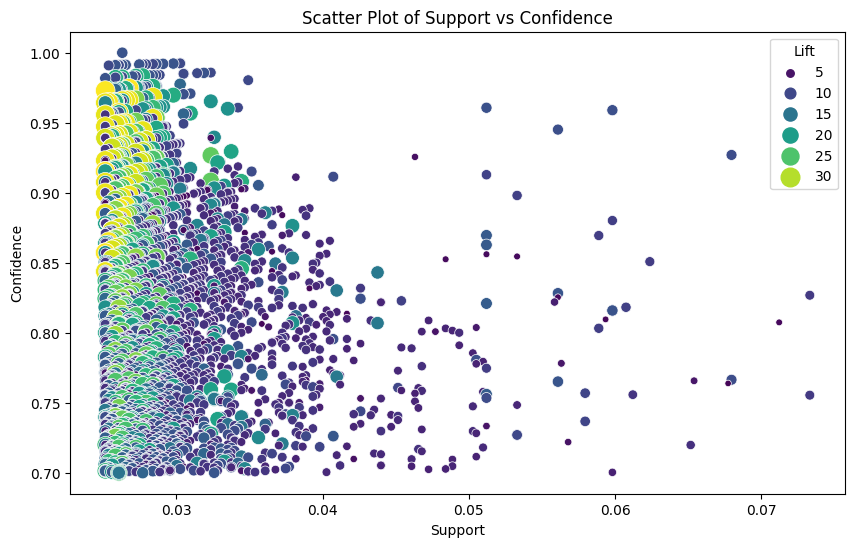

In [20]:
# Plot scatter plot of Support vs Confidence
plt.figure(figsize=(10,6))
sns.scatterplot(data=rules_new, x='support', y='confidence', hue='lift', palette='viridis', size='lift', sizes=(20, 200))
plt.title('Scatter Plot of Support vs Confidence')
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.legend(title='Lift')
plt.show()

In [21]:
# Print the top 5 rules
print("Top 5 Rules based on Confidence:")
print(top_5_rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']])


Top 5 Rules based on Confidence:
                                            antecedents  \
1438  (Itemname_REGENCY SUGAR BOWL GREEN, Itemname_R...   
1492  (Itemname_ROSES REGENCY TEACUP AND SAUCER, Ite...   
1491  (Itemname_PINK REGENCY TEACUP AND SAUCER, Item...   
1463  (Itemname_ROSES REGENCY TEACUP AND SAUCER, Ite...   
1455  (Itemname_REGENCY TEA PLATE ROSES, Itemname_PI...   

                                     consequents   support  confidence  \
1438  (Itemname_GREEN REGENCY TEACUP AND SAUCER)  0.026297    1.000000   
1492  (Itemname_GREEN REGENCY TEACUP AND SAUCER)  0.030254    0.992366   
1491  (Itemname_ROSES REGENCY TEACUP AND SAUCER)  0.030254    0.992366   
1463  (Itemname_GREEN REGENCY TEACUP AND SAUCER)  0.029788    0.992248   
1455  (Itemname_GREEN REGENCY TEACUP AND SAUCER)  0.029090    0.992063   

           lift  
1438  11.278215  
1492  11.192122  
1491  10.225896  
1463  11.190787  
1455  11.188706  


**MOST IMPORTANT RULES:**

*Antecedents:* These are the items or itemsets that are the starting point of an association rule (items that lead to the rule). 

*Consequents:* These are the items or itemsets that are predicted or associated with the antecedents (items predicted by the rule).

*Support:* Measures how often a rule appears in the dataset. Higher support means the rule applies to more transactions.

*Lift:* Measures how much more likely the items are bought together than by chance.

    * Lift > 1: Strong positive relationship.
    * Lift = 1: No relationship.
    * Lift < 1: Negative relationship.

**SCATTER PLOT INFERENCE:**

Rules with higher confidence show a stronger relationship between antecedents and consequents.

 Lift helps identify the strength of association: higher lift values indicate stronger relationships.

------

With this, we draw a close to our multiverse adventure and head back to our original world.



Hope this exercise helped you learn something new and hone your skills as a Data Analyst!



Until next time :)